### Basic Setup

In [1]:
import polars as pl
from matplotlib import pyplot as plt
from dataclasses import dataclass
import numpy as np
from  sklearn.metrics import mean_absolute_percentage_error

In [2]:
datadir = "C:\\Users\\hdt.OJ\\OneDrive - OJ Electronics A S\\Thesis\\report\\data"

modbus_log = f"{datadir}\\Test 2\\ModbusGUI-Log-2024-02-28T145324.csv"
base_log = f"{datadir}\\Test 2\\BaseLog-2024-02-28T145348.csv"

# modbus_log = f"{datadir}\\Test 3\\ModbusGUI-Log-2024-02-29T120935.csv"
# base_log = f"{datadir}\\Test 3\\BaseLog-2024-02-29T121152.csv"

# modbus_log = f"{datadir}\\Test 4\\ModbusGUI-Log-2024-03-01T163054.csv"
# base_log = f"{datadir}\\Test 4\\BaseLog-2024-03-01T163114.csv"

# modbus_log = f"{datadir}\\Test 5\\ModbusGUI-Log-2024-03-01T173112.csv"
# base_log = f"{datadir}\\Test 5\\BaseLog-2024-03-01T173129.csv"

### Start Data Processing for Test 2

In [3]:
modbus_df = pl.read_csv(modbus_log)
base_df = pl.read_csv(base_log)

In [4]:
modbus_df = modbus_df.rename(mapping={'TimeStamp':'timestamp'})
modbus_df = modbus_df.drop("time_monotonic_seconds", "pwm_info_pulse_target")
modbus_df.head()

timestamp,temperature_ambient,temperature_floor,regulation_setpoint,regulation_relay_state
str,f64,f64,f64,i64
"""2024-02-28_14:…",26.5,21.97,19.0,0
"""2024-02-28_14:…",26.5,21.97,19.0,0
"""2024-02-28_14:…",26.49,21.97,19.0,0
"""2024-02-28_14:…",26.49,21.97,19.0,0
"""2024-02-28_14:…",26.48,21.97,19.0,0


In [5]:
base_df = base_df[[
    "timestamp",
    "sec              ",
    "RefFloor-(CG0)   ",
    "RefRoom-(CG1)    ",
    "RefTopFloor-(CG3)",
    "AirInHouse-(CG4) "
]]

base_df.head()

timestamp,sec,RefFloor-(CG0),RefRoom-(CG1),RefTopFloor-(CG3),AirInHouse-(CG4)
str,i64,i64,i64,i64,i64
"""2024-02-28_14:…",9,223,240,220,225
"""2024-02-28_14:…",10,223,240,220,226
"""2024-02-28_14:…",11,223,240,220,225
"""2024-02-28_14:…",12,223,240,220,225
"""2024-02-28_14:…",13,223,240,220,226


In [6]:
df = modbus_df.join(base_df, on="timestamp", how="inner")
df.head()

timestamp,temperature_ambient,temperature_floor,regulation_setpoint,regulation_relay_state,sec,RefFloor-(CG0),RefRoom-(CG1),RefTopFloor-(CG3),AirInHouse-(CG4)
str,f64,f64,f64,i64,i64,i64,i64,i64,i64
"""2024-02-28_14:…",26.46,21.97,19.0,0,9,223,240,220,225
"""2024-02-28_14:…",26.45,21.97,19.0,0,10,223,240,220,226
"""2024-02-28_14:…",26.45,21.97,19.0,0,11,223,240,220,225
"""2024-02-28_14:…",26.44,21.97,19.0,0,12,223,240,220,225
"""2024-02-28_14:…",26.43,21.98,19.0,0,13,223,240,220,226


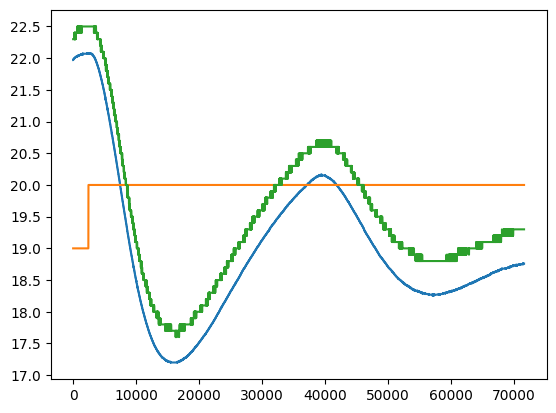

In [7]:
# df[f"regulation_setpoint"][0:-1] = 20

plt.figure(1)
plt.plot(df["temperature_floor"])
# df.replace("regulation_setpoint", pl.Series(np.full(df.height, 20.0)))
plt.plot(df["regulation_setpoint"])
# plt.plot(df["RefTopFloor-(CG3)"])
plt.plot(df["RefFloor-(CG0)   "]/10)
# plt.plot(df["AirInHouse-(CG4) "]/10)
plt.yticks(np.arange(17, 23, 0.5))
plt.show()

In [8]:
def count_relay_switch(relay_states: pl.Series):
    state_difference = (relay_states[1:-1] - relay_states[0:-2]).abs()
    return state_difference.sum()

mape =  mean_absolute_percentage_error(df["regulation_setpoint"], df["temperature_floor"])

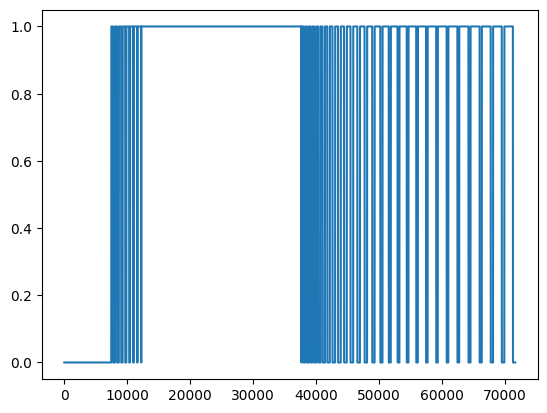

Total number of relay clicks is:  74
Mean absolute percentage error of this test is:  0.06983323688873648


In [9]:
plt.figure(2)
plt.plot(df["regulation_relay_state"])
plt.show()
print("Total number of relay clicks is: ", count_relay_switch(df["regulation_relay_state"]))
print("Mean absolute percentage error of this test is: ", mape)

The actual IO diagram is generated by the PI controller, hence not very well-fitted to be used for System Identification (SI) because SI requires a natural response under step input.

In [10]:
# u2 = df["regulation_relay_state"]*4 # Actual load (4A) of test 2. See more in test_config.xlsx
# u2.slice(0, 12249) = 0

# y2 = df["temperature_floor"]
# plt.plot(u2)


In [12]:
df.write_csv(f"{datadir}\\si.csv")